<a href="https://colab.research.google.com/github/Devansharma/Deep_Learning/blob/master/ConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

In [93]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

torch.Size([4, 3, 32, 32])


In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

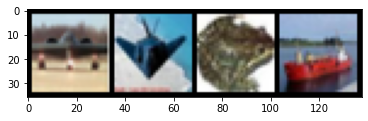

plane plane frog ship


In [95]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn

In [106]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.ReLU(),
        nn.AvgPool2d(2, stride = 2),
        nn.Conv2d(6, 16, 5),
        nn.ReLU(),
        nn.AvgPool2d(2, stride = 2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84), 
        nn.ReLU(),
        nn.Linear(84, 10)
    )
  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

In [123]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                                        transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, 
                                       transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100*(correct/total)

In [0]:
net = LeNet().to(device)

In [0]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
opt  = optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-5)

Epoch: 0/16, Test acc: 26.84, Train acc: 26.51
Epoch: 1/16, Test acc: 31.97, Train acc: 31.34
Epoch: 2/16, Test acc: 34.72, Train acc: 34.89
Epoch: 3/16, Test acc: 37.92, Train acc: 37.31
Epoch: 4/16, Test acc: 39.18, Train acc: 39.26
Epoch: 5/16, Test acc: 41.10, Train acc: 40.84
Epoch: 6/16, Test acc: 42.13, Train acc: 42.11
Epoch: 7/16, Test acc: 42.15, Train acc: 42.61
Epoch: 8/16, Test acc: 43.06, Train acc: 43.15
Epoch: 9/16, Test acc: 44.14, Train acc: 44.19
Epoch: 10/16, Test acc: 44.09, Train acc: 44.83
Epoch: 11/16, Test acc: 45.00, Train acc: 45.37
Epoch: 12/16, Test acc: 45.85, Train acc: 46.05
Epoch: 13/16, Test acc: 45.71, Train acc: 46.07
Epoch: 14/16, Test acc: 46.71, Train acc: 46.91
Epoch: 15/16, Test acc: 47.19, Train acc: 47.14


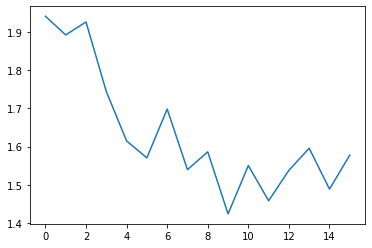

CPU times: user 2min 58s, sys: 2.34 s, total: 3min 1s
Wall time: 3min 1s


In [127]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epoch = 16
for epoch in range(max_epoch):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epoch, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()